<a href="https://colab.research.google.com/github/shyamjith94/PyTorch/blob/main/DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
%%capture
!pip install torch torchvision

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch, torchvision
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("/content/drive/MyDrive/PyTorch/Data/iris.csv")

In [6]:
print(data.head())
data.shape

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]


(150, 5)

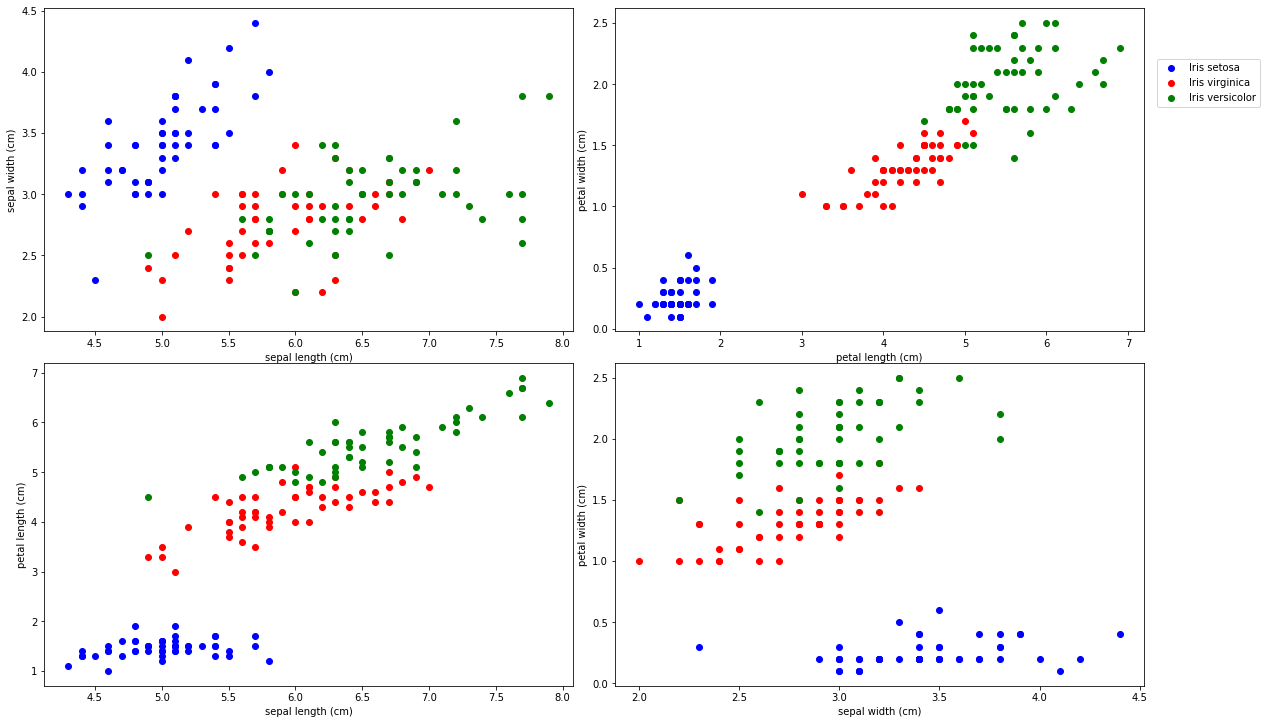

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
fig.tight_layout()


plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']

labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = data.columns[plots[i][0]]
        y = data.columns[plots[i][1]]
        ax.scatter(data[data['target']==j][x], data[data['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

**Train Test Split**

In [27]:
features = data.drop('target', axis=1).values
label = data['target'].values

In [28]:
x_train, x_test, y_train,y_test = train_test_split(features, label, test_size=0.2, random_state=33)

In [38]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)


In [40]:
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [45]:
# pytorch build in method
features = data.drop('target', axis=1).values
label = data['target'].values

iris = TensorDataset(torch.FloatTensor(features), torch.LongTensor(label))
for i in iris[:5]:
    print(i)

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])
tensor([0, 0, 0, 0, 0])


In [57]:
iris_loader = DataLoader(iris, batch_size=50, shuffle=True)
for batch, sample_batch in enumerate(iris_loader):
    print(batch, sample_batch[:60])


0 [tensor([[6.9000, 3.1000, 5.4000, 2.1000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.7000, 2.5000, 5.0000, 2.0000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.8000, 2.8000, 5.1000, 2.4000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [6.5000, 3.0000, 5.2000